In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("E:\\Python Scripts\\SU\\CV2\\clusters3.csv", sep=";")

In [3]:
df

,X,Y
0,-8.904622,9.340533
1,-8.854129,10.615803
2,-8.750245,10.174964
3,-7.242460,9.180114
4,-7.314041,7.264030
...,...,...
295,-4.294379,0.827367
296,-3.137465,0.425249
297,-4.235766,1.464253
298,-3.517088,0.990882


In [42]:
def EuclideanDistance(a,b):
    return math.sqrt(pow(a.X - b.X,2) + pow(a.Y - b.Y,2))
def ManhattanDistance(a,b):
    return abs(abs((a.X - b.X)) + abs((a.Y - b.Y)))
def CosineDistance(a,b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [5]:
print(f"Euclid: {EuclideanDistance(df.iloc[0], df.iloc[1])}")
print(f"Manhattan: {ManhattanDistance(df.iloc[0], df.iloc[1])}")

Euclid: 1.2762691531370254
Manhattan: 1.3257627663062994


In [6]:
df.shape

(300, 2)

In [40]:
def DistanceMatrixEuclid(df):
    matrix = []
    for i in range(0, df.shape[0]):
        matrix.append([])
        for j in range(0, df.shape[0]):
            iItem = df.iloc[i]
            jItem = df.iloc[j]
            distance = EuclideanDistance(iItem,jItem)
            matrix[i].append(distance)
    return matrix

def DistanceMatrixManhattan(df):
    matrix = []
    for i in range(0, df.shape[0]):
        matrix.append([])
        for j in range(0, df.shape[0]):
            iItem = df.iloc[i]
            jItem = df.iloc[j]
            distance = ManhattanDistance(iItem,jItem)
            matrix[i].append(distance)
    return matrix

def DistanceMatrixCosine(df):
    matrix = []
    for i in range(0, df.shape[0]):
        matrix.append([])
        for j in range(0, df.shape[0]):
            iItem = df.iloc[i]
            jItem = df.iloc[j]
            distance = CosineDistance(iItem,jItem)
            matrix[i].append(distance)
    return matrix

def setInf(index,matrix):
    inf = 40000
    for i in range(0,len(matrix)):
        matrix[index][i] = inf
        matrix[i][index] = inf
    return matrix

def getIndices(matrix):
    inf = 40000
    smallestDistance = inf
    indexI, indexJ = 0, 0
    for i in range(0, len(matrix)):
        for j in range(0, len(matrix)):
            if smallestDistance > matrix[i][j] and i != j:
                smallestDistance = matrix[i][j]
                indexI = i
                indexJ = j
    return (indexI,indexJ)

def updateMatrixSingleLinkage(indexI, indexJ, matrix):
    for i in range(0,len(matrix)):
        if matrix[indexI][i] > matrix[indexJ][i]:
                   matrix[indexI][i] = matrix[indexJ][i]
    return matrix

def updateMatrixCompleteLinkage(indexI, indexJ, matrix):
    for i in range(0,len(matrix)):
        if matrix[indexI][i] < matrix[indexJ][i]:
                   matrix[indexI][i] = matrix[indexJ][i]
    return matrix
def SingleLinkage(df, n_clusters = 1, euclid = True):
    clusters = {}
    if(euclid):  
        matrix = DistanceMatrixEuclid(df)
    else:
        matrix = DistanceMatrixManhattan(df)
    for i in range(0,len(matrix)):
        clusters[i] = []
        clusters[i].append(i)
    clusterCount = len(matrix)
    while(n_clusters < clusterCount):
        indices = getIndices(matrix)
        matrix = updateMatrixSingleLinkage(indices[0],indices[1], matrix)
        matrix = setInf(indices[1], matrix)
        #print(clusters)
        clusters[indices[0]] += clusters[indices[1]]
        clusters.pop(indices[1], None)
        clusterCount -= 1
    return clusters

def SingleLinkageCosine(df, n_clusters = 1, euclid = True):
    clusters = {}
    matrix = DistanceMatrixCosine(df)
    for i in range(0,len(matrix)):
        clusters[i] = []
        clusters[i].append(i)
    clusterCount = len(matrix)
    while(n_clusters < clusterCount):
        indices = getIndices(matrix)
        matrix = updateMatrixSingleLinkage(indices[0],indices[1], matrix)
        matrix = setInf(indices[1], matrix)
        #print(clusters)
        clusters[indices[0]] += clusters[indices[1]]
        clusters.pop(indices[1], None)
        clusterCount -= 1
    return clusters

def CompleteLinkage(df, n_clusters = 1, euclid = True):
    clusters = {}
    if(euclid):  
        matrix = DistanceMatrixEuclid(df)
    else:
        matrix = DistanceMatrixManhattan(df)
    for i in range(0,len(matrix)):
        clusters[i] = []
        clusters[i].append(i)
    clusterCount = len(matrix)
    while(n_clusters < clusterCount):
        indices = getIndices(matrix)
        matrix = updateMatrixCompleteLinkage(indices[0],indices[1], matrix)
        matrix = setInf(indices[1], matrix)
        #print(clusters)
        clusters[indices[0]] += clusters[indices[1]]
        clusters.pop(indices[1], None)
        clusterCount -= 1
    return clusters

def CompleteLinkageTest(df, n_clusters = 1, euclid = True):
    clusters = {}
    plotMatrix = []
    idTranslation = {}
    if(euclid):  
        matrix = DistanceMatrixEuclid(df)
    else:
        matrix = DistanceMatrixManhattan(df)
    nextId = len(matrix)
    for i in range(0,len(matrix)):
        idTranslation[i] = i
    for i in range(0,len(matrix)):
        clusters[i] = []
        clusters[i].append(i)
    clusterCount = len(matrix)
    while(n_clusters < clusterCount):
        row = []
        indices = getIndices(matrix)
        idTranslation[indices[0]] = nextId
        nextId += 1
        matrix = updateMatrixCompleteLinkage(indices[0],indices[1], matrix)
        distance = matrix[indices[1]][indices[0]]
        matrix = setInf(indices[1], matrix)
        #print(clusters)
        clusters[indices[0]] += clusters[indices[1]]
        clusters.pop(indices[1], None)
        clusterCount -= 1
        row.append(idTranslation[indices[0]])
        row.append(idTranslation[indices[1]])
        row.append(distance)
        row.append(len(clusters[indices[0]]))
        #print(row)
        plotMatrix.append(row)
    sorted(plotMatrix,key=lambda l:l[-1])
    plotMatrix = np.array(plotMatrix)
    ##print(idTranslation)
    #rint(plotMatrix)
    dendrogram(plotMatrix)
    return clusters

In [8]:
singleLinkageEuclidClusters = SingleLinkage(df, 3, True)

In [9]:
singleLinkageManhattanClusters = SingleLinkage(df, 3, False)

In [10]:
completeLinkageEuclidClusters = CompleteLinkage(df, 3, True)

In [11]:
completeLinkageManhattanClusters = CompleteLinkage(df, 3, False)

In [48]:
#completeLinkageManhattanClusters = CompleteLinkageTest(df, 1, False)

ValueError: Linkage 'Z' uses non-singleton cluster before it is formed.

In [13]:
def addClustersToDataFrame(df, clusters):
    df["cluster"] = -1
    for i in range(0,df.shape[0]):
        for j in clusters.keys():
            if i in clusters[j]:
                df.loc[i, "cluster"] = j
    return df

In [14]:
dfSLE = addClustersToDataFrame(df.copy(), singleLinkageEuclidClusters)
dfSLM = addClustersToDataFrame(df.copy(), singleLinkageManhattanClusters)
dfCLE = addClustersToDataFrame(df.copy(), completeLinkageEuclidClusters)
dfCLM = addClustersToDataFrame(df.copy(), completeLinkageManhattanClusters)

In [15]:
dfSLE

,X,Y,cluster
0,-8.904622,9.340533,46
1,-8.854129,10.615803,46
2,-8.750245,10.174964,46
3,-7.242460,9.180114,46
4,-7.314041,7.264030,46
...,...,...,...
295,-4.294379,0.827367,241
296,-3.137465,0.425249,241
297,-4.235766,1.464253,241
298,-3.517088,0.990882,241


Text(0.5, 1.08, 'Single Linkage Euclidean Distance')

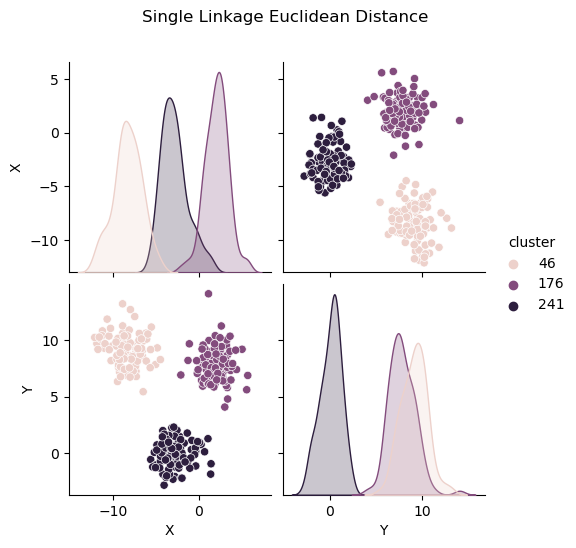

In [16]:
SLE = sns.pairplot(data = dfSLE, hue = "cluster")
SLE.fig.suptitle("Single Linkage Euclidean Distance", y = 1.08)

Text(0.5, 1.08, 'Single Linkage Manhattan Distance')

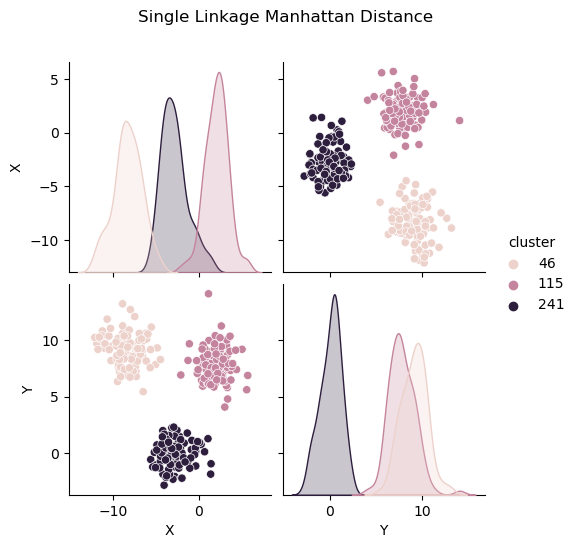

In [17]:
SLM = sns.pairplot(data = dfSLM, hue = "cluster")
SLM.fig.suptitle("Single Linkage Manhattan Distance", y = 1.08)

Text(0.5, 1.08, 'Complete Linkage Euclidean Distance')

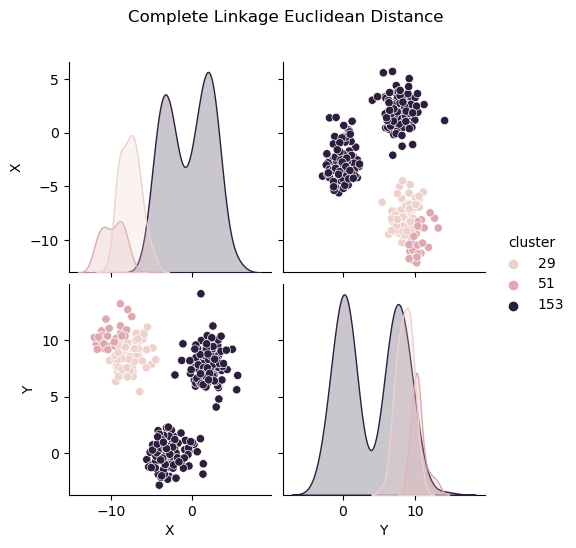

In [18]:
CLE = sns.pairplot(data = dfCLE, hue = "cluster")
CLE.fig.suptitle("Complete Linkage Euclidean Distance", y = 1.08)

Text(0.5, 1.08, 'Complete Linkage Manhattan Distance')

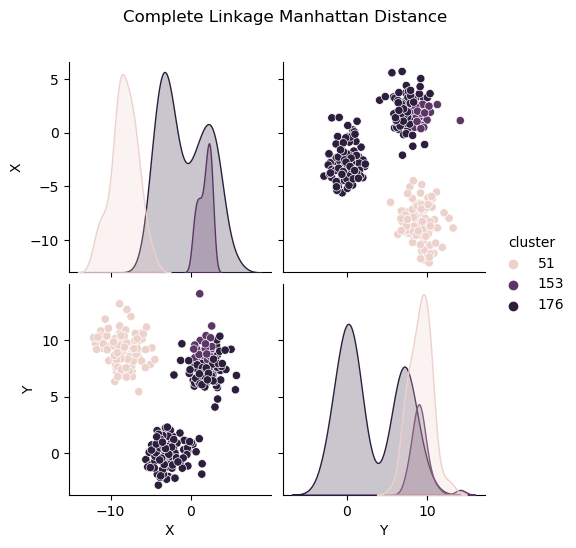

In [34]:
CLM = sns.pairplot(data = dfCLM, hue = "cluster")
CLM.fig.suptitle("Complete Linkage Manhattan Distance", y = 1.08)

In [20]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]

In [21]:
X

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [22]:
Z = linkage(X, 'ward')

In [23]:
Z

array([[ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 2.        ,  7.        ,  0.        ,  2.        ],
       [ 0.        ,  4.        ,  1.        ,  2.        ],
       [ 1.        ,  8.        ,  1.15470054,  3.        ],
       [ 9.        , 10.        ,  2.12132034,  4.        ],
       [ 3.        , 12.        ,  4.11096096,  5.        ],
       [11.        , 13.        , 14.07183949,  8.        ]])

In [28]:
dfStand = pd.read_csv("E:\\Python Scripts\\SU\\CV2\\clusters3.csv", sep=";")
XMean = dfStand.loc[:, 'X'].mean()
YMean = dfStand.loc[:, 'Y'].mean()
dfStand['X'] -= XMean
dfStand['Y'] -= YMean

In [29]:
dfStand.mean()

X    0.000000e+00
Y   -9.473903e-16
dtype: float64

In [30]:
dfNorm = pd.read_csv("E:\\Python Scripts\\SU\\CV2\\clusters3.csv", sep=";")
dfNorm = (dfNorm-dfNorm.min())/(dfNorm.max()-dfNorm.min())

In [31]:
dfNorm

,X,Y
0,0.180025,0.717995
1,0.182859,0.793370
2,0.188688,0.767314
3,0.273294,0.708514
4,0.269277,0.595264
...,...,...
295,0.438719,0.214828
296,0.503637,0.191061
297,0.442008,0.252471
298,0.482335,0.224492


In [43]:
standardized = SingleLinkageCosine(dfStand, 3, True)
normalized = SingleLinkageCosine(dfNorm, 3, True)

In [44]:
dfStandC = addClustersToDataFrame(dfStand.copy(), standardized)
dfNormC = addClustersToDataFrame(dfNorm.copy(), normalized)

Text(0.5, 1.08, 'Single Linkage Euclidean Distance Stand')

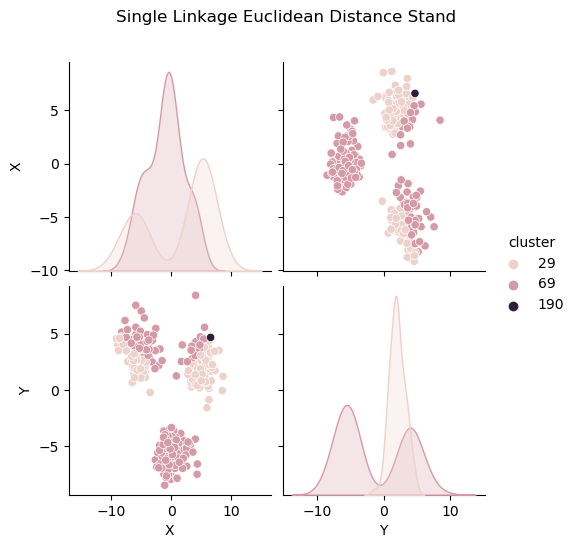

In [45]:
SLE = sns.pairplot(data = dfStandC, hue = "cluster")
SLE.fig.suptitle("Single Linkage Euclidean Distance Stand", y = 1.08)

Text(0.5, 1.08, 'Single Linkage Euclidean Distance Norm')

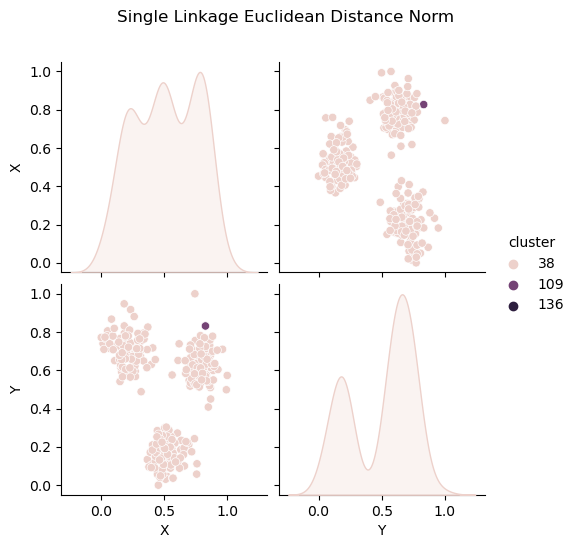

In [47]:
SLE = sns.pairplot(data = dfNormC, hue = "cluster")
SLE.fig.suptitle("Single Linkage Euclidean Distance Norm", y = 1.08)